In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
energy=pd.read_csv("Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv")

In [3]:
# How many different companies are represented in the data set
energy['Company Name'].nunique()

439

In [4]:
# Total number of jobs created for businesses in Queens?

#energy.columns.values.tolist()
#energy.groupby(["City"])["Job created"].sum()
#eQns=energy[energy["City"]=="Queens"]
#eQns["Job created"].sum()
energy[energy["City"]=="Queens"]["Job created"].sum()


90.0

In [5]:
# How many different unique email domains names are there in the data set?
emlist=energy["company email"].str.split('@').str[1]
emlist.nunique()


356

In [6]:
energy.columns.values.tolist()
# Considering only NTAs with at least 5 listed businesses, what is the average total savings and the total jobs created for each NTA?
#a=energy.groupby(["NTA"])["NTA"].count()
#b=energy.groupby("NTA",sort=False).count()
#c=b.sort_values("NTA",ascenting=False)["Total savings"]
g1=energy[["NTA","Job created","Total Savings"]]
g2nm=g1.groupby(["NTA"])["NTA"].count().index.tolist()
g2=g1.groupby(["NTA"])["NTA"].count()
indref=np.zeros(79)
for i in range(79):
  if g2[i]>=5:
#    print(g2[i])
    indref[i]=1;
#print(indref)
#g2nm
g4 = pd.DataFrame(
    {
        "NTA": [],
        "Avg Total Savings": [],
        "Total Jobs created": [],
    }
)


# write the index to an array
jbs=np.zeros(79)
tsav=np.zeros(79)
for i in range(79):
  if g2[i]>=5:
    g3=g1[g1["NTA"]==g2nm[i]].index
    jbs[i]=g1.iloc[g3,1].sum()
    tsav[i]=g1.iloc[g3,2].mean()
    g4.loc[len(g4.index)]=[g2nm[i], tsav[i], jbs[i]]
#    print(g1.iloc[g3,1])

#print(jbs.sum())

g4.to_csv('Day4.csv',index=False)

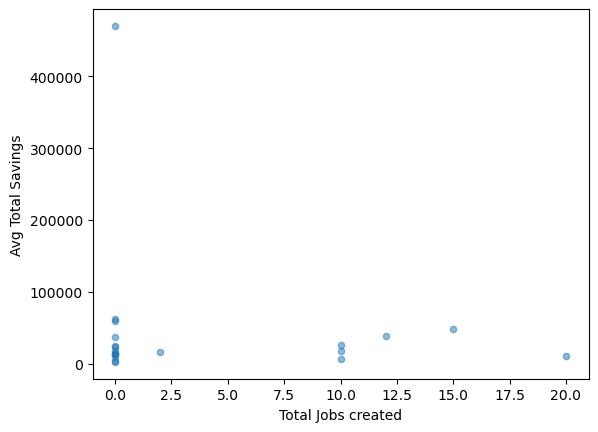

In [7]:
g4.plot.scatter(x="Total Jobs created", y="Avg Total Savings", alpha=0.5 )
plt.show()

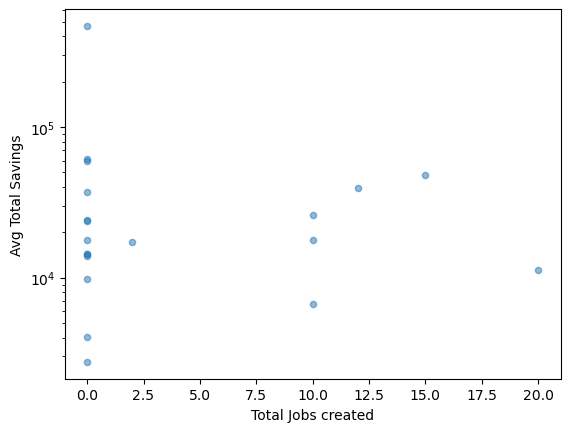

In [8]:
g4.plot.scatter(x="Total Jobs created", y="Avg Total Savings", alpha=0.5 )
plt.yscale("log")


Text(0, 0.5, 'Avg Total Savings')

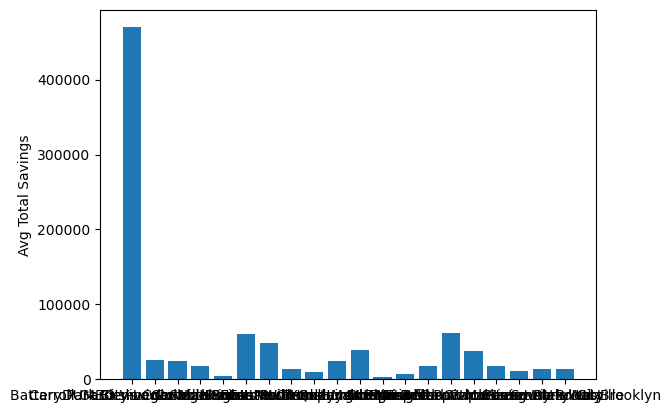

In [12]:
#g4.plot.hist()
f1=g4["NTA"]
f2=g4["Avg Total Savings"]
fig, ax=plt.subplots()
ax.bar(f1,f2)
ax.set_ylabel('Avg Total Savings')